In [2]:
import sys
sys.path.append("pyESN")
import numpy as np
from matplotlib import pyplot as plt
import pandas

from pyESN import ESN
import sklearn.metrics as sm
from scipy.special import expit

from sklearn import preprocessing

%matplotlib inline

In [3]:
def getDataWindowed(data,inSize,outSize):
    if outSize > inSize:
        biggest = outSize
    else:
        biggest = inSize
    
    matrixIn = np.zeros((len(data)-biggest, inSize))
    matrixOut = np.zeros((len(data)-biggest, outSize))
    
    for i in range(len(data)-2*biggest):
        matrixIn[i,:] = data[i:i+inSize]
        matrixOut[i,:] = data[i+inSize+1:i+inSize+outSize+1]
    return matrixIn,matrixOut

## Reading Data

In [4]:
b08 = pandas.read_csv('../data/b08c2.csv')
b08_viento = b08["viento"].as_matrix()

prediction_steps = 12
input_steps = 12

## Dividing data and creating Normalization/Standarization

In [5]:
train_perc = 0.8

datalen = len(b08_viento)
trainlen = int(train_perc*(datalen))

minmax = preprocessing.MinMaxScaler() 
standarization = preprocessing.StandardScaler()

minmax.fit(b08_viento[:trainlen].reshape(-1,1))
standarization.fit(b08_viento[:trainlen].reshape(-1,1))

preproc = minmax

data = preproc.transform(b08_viento.reshape(-1,1)).reshape((-1,))

In [6]:
dataIn,dataOut = getDataWindowed(data,input_steps,prediction_steps)

In [7]:
esn = ESN(n_inputs = input_steps,
          n_outputs = prediction_steps,
          n_reservoir = 1000,
          random_state=42,
          spectral_radius = 1.5,
          sparsity=0.3,
          teacher_forcing x= True,
          silent= False)

In [8]:
train_data,train_output = dataIn[:trainlen],dataOut[:trainlen]
test_data, test_output  = dataIn[trainlen:-prediction_steps],dataOut[trainlen:-prediction_steps]

In [9]:
pred_training = esn.fit(train_data,train_output)

harvesting states...
fitting...
training error:
0.0274442948029


In [10]:
train_data.shape

(9331, 12)

In [11]:
prediction = esn.predict(test_data)

In [12]:
print sm.mean_squared_error(test_output, prediction)
print sm.explained_variance_score(test_output,prediction)
print sm.mean_absolute_error(test_output,prediction)
print sm.r2_score(test_output,prediction)

0.0209222399813
0.281755124706
0.110732277934
0.136811203167


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


T = 1


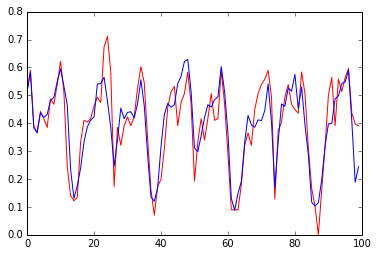

T = 2


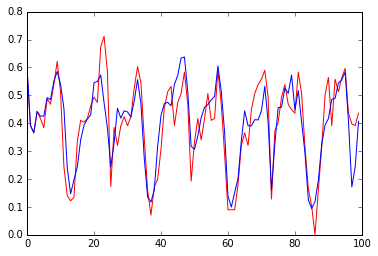

T = 3


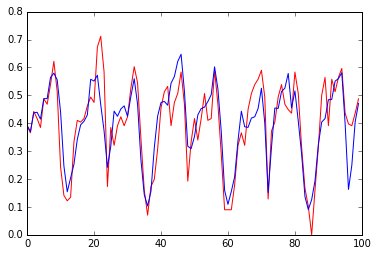

T = 4


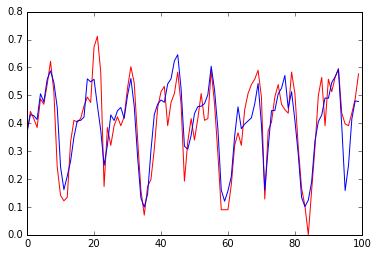

T = 5


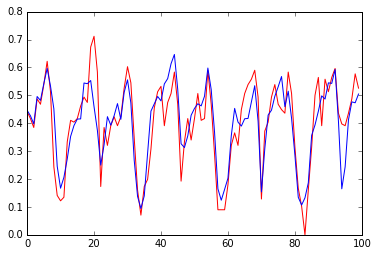

T = 6


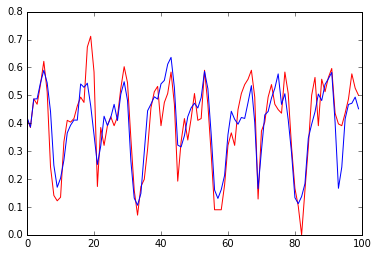

T = 7


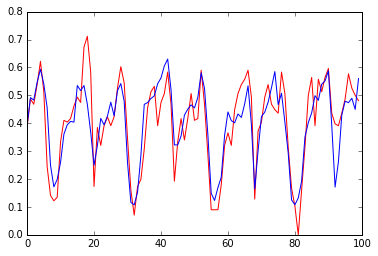

T = 8


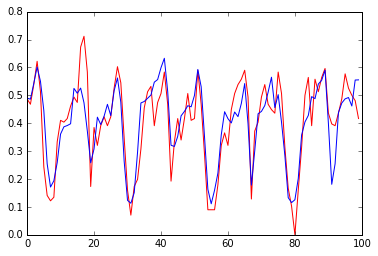

T = 9


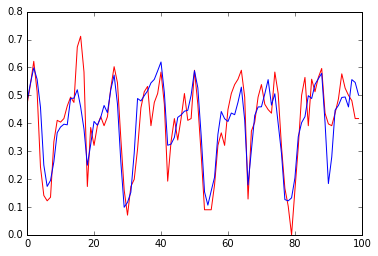

T = 10


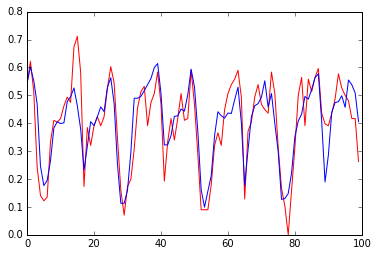

T = 11


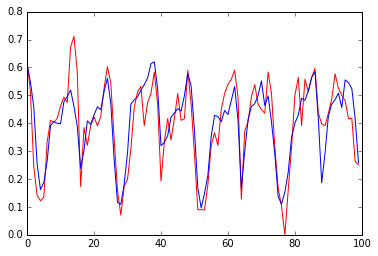

T = 12


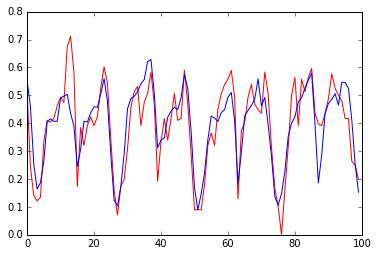

In [13]:
for i in range(12):
    print "T = "+ str(i+1)
    fig = plt.figure()
    plt.plot(test_output[:100,i], 'r')
    plt.plot(prediction[:100,i])
    plt.show()